In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # Import MNIST dataset from TensorFlow

# Helper functions
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    
    return Z, cache

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    
    return A, cache

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    elif activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    cache = (linear_cache, activation_cache)
    
    return A, cache

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    
    return cost

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    
    return dZ

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    
    return parameters

# 2-layer neural network model
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters directly
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        # Forward propagation
        A1, cache1 = linear_activation_forward(X, parameters["W1"], parameters["b1"], "relu")
        A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], "sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # Update parameters
        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    
    # Plot the cost
    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parameters



Cost after iteration 0: 6.925685030392598
Cost after iteration 100: 3.358853846719956
Cost after iteration 200: 3.3109850974091874
Cost after iteration 300: 3.224081061095558
Cost after iteration 400: 3.056642318372652
Cost after iteration 500: 2.7950380597112123
Cost after iteration 600: 2.4954566203662933
Cost after iteration 700: 2.226339509576436
Cost after iteration 800: 2.0094661610735898
Cost after iteration 900: 1.8369415835999157


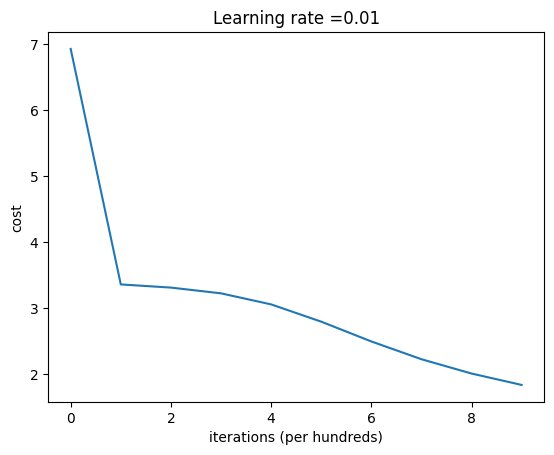

Train Accuracy: 78.32%
Test Accuracy: 78.95%


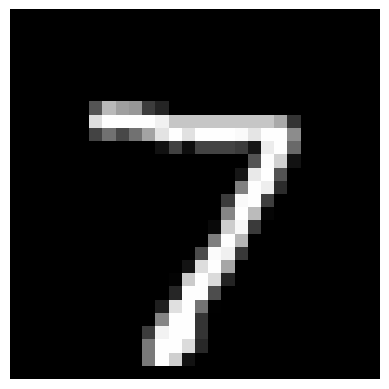

Prediction: 7
Actual Label: 7


In [4]:
def predict(parameters, X):
    # Forward propagation
    A1, _ = linear_activation_forward(X, parameters["W1"], parameters["b1"], "relu")
    A2, _ = linear_activation_forward(A1, parameters["W2"], parameters["b2"], "sigmoid")
    
    # Convert probabilities to predictions
    predictions = np.argmax(A2, axis=0)
    
    return predictions

# Load MNIST dataset
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

# Flatten the images
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T / 255.
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T / 255.

# Convert labels to one-hot encoding
def one_hot_encode(labels, num_classes):
    encoded_labels = np.zeros((num_classes, labels.shape[0]))
    for i in range(labels.shape[0]):
        encoded_labels[labels[i], i] = 1
    return encoded_labels

Y_train = one_hot_encode(Y_train_orig, 10)
Y_test = one_hot_encode(Y_test_orig, 10)

# Train the model
layers_dims = [X_train.shape[0], 128, 10]  # Input size, hidden layer size, output size
parameters = two_layer_model(X_train, Y_train, layers_dims, learning_rate=0.01, num_iterations=1000, print_cost=True)

# Make predictions on the test set
predictions_train = predict(parameters, X_train)
predictions_test = predict(parameters, X_test)

# Calculate accuracy
accuracy_train = np.mean(predictions_train == np.argmax(Y_train, axis=0)) * 100
accuracy_test = np.mean(predictions_test == np.argmax(Y_test, axis=0)) * 100
print("Train Accuracy: {:.2f}%".format(accuracy_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))

# Let's pick an image from the test set and make a prediction
index = 0  # Change this index to select a different image
image = X_test[:, index].reshape(28, 28)  # Reshape the image to its original dimensions
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Make a prediction for the selected image
prediction = predict(parameters, X_test[:, index].reshape(-1, 1))
print("Prediction:", prediction[0])
print("Actual Label:", np.argmax(Y_test[:, index]))